In [1]:
%matplotlib inline

from pymc3 import Normal, Model, HalfNormal
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

Couldn't import dot_parser, loading of dot files will not be possible.


/home/greg/Programs/ipython/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


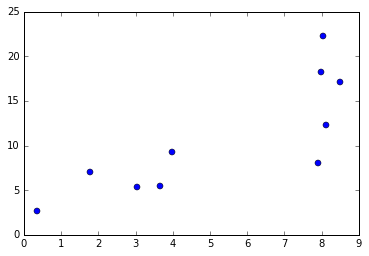

In [73]:
N = 10
a = 2
b = np.random.normal(2, 1, N)

xobs = np.random.uniform(0, 10, N)

yobs = a + b * xobs

plt.plot(xobs, yobs, "o")
plt.show()

In [74]:
with pm.Model() as hierarchical_model:
    # hyperparameters
    mu_b = pm.Normal('mu_b', mu=0., sd=100**2)
    sigma_b = pm.Uniform('sigma_b', lower=0, upper=100)

    a = 2 #pm.Normal('a', mu=2, sd=100**2)
    b = pm.Normal('b', mu=mu_b, sd=sigma_b, shape=N)
    
    eps = pm.Uniform('eps', lower=0, upper=10)
    
    mu = a + b * xobs
    
    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=eps, observed=yobs)


In [ ]:
nsamples = 100000
nburn = 5000
with hierarchical_model:
    step = pm.Metropolis()
    hierarchical_trace = pm.sample(nsamples, step, progressbar=True)

 [------------     31%                  ] 31790 of 100000 complete in 57.6 sec

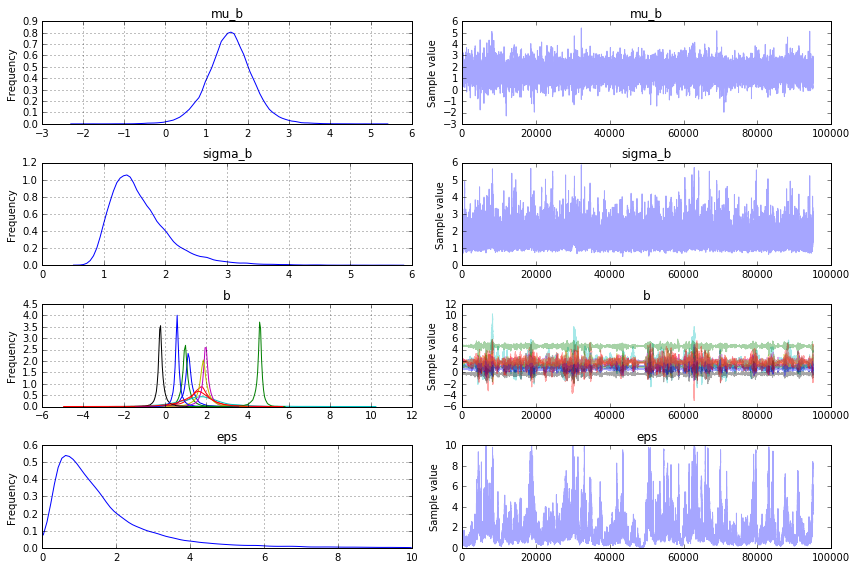

In [55]:
pm.traceplot(hierarchical_trace[nburn:]);

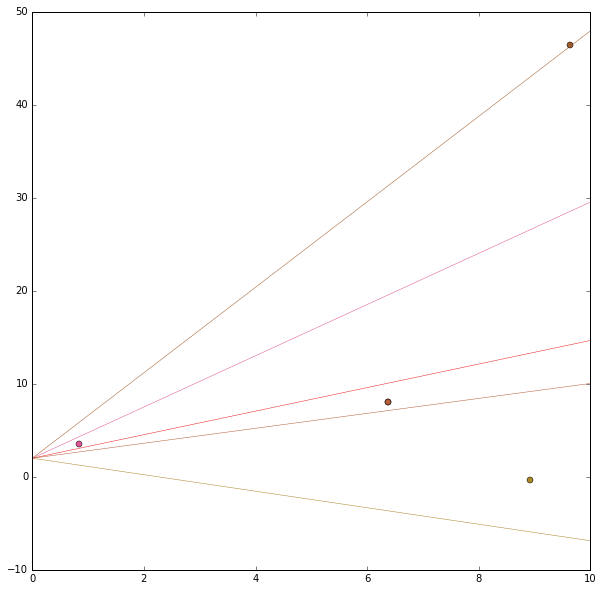

In [71]:
npp = 5
repeats = 1
fig, ax = plt.subplots(figsize=(10, 10))
xfit = np.linspace(0, 10, 100)

for i  in np.random.randint(0, N, npp):
    color = np.random.uniform(0, 1, 3)
    for j in range(repeats):
        s = hierarchical_trace[np.random.randint(nburn, nsamples)]
        yfit = SignalModel(xfit, 2, s['b'][i])
        ax.plot(xfit, yfit, "-", lw=0.5, color=color)
    ax.plot(xobs[i], yobs[i], "o", color=color)
    
plt.show()

In [ ]:
np.random.randi